In [169]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [100]:
def chunks(l, n):
    n = max(1, n)
    return (l[i:i+n] for i in range(0, len(l), n))

In [159]:
data = []

for i in range(56):
    with open('buffers/' + str(i) + '.wav', 'rb') as file:
        d1 = [bytes([b]) for b in file.read()[44:32000]]
        d2 = [i[0] + i[1] for i in list(chunks(d1, 2))]
        d3 = [int.from_bytes(i, byteorder='big', signed=True) for i in d2]
        data.append(d3)
        
print(len(data[0]))

15978


In [149]:
def smooth(data, points):
    ret = []
    for i in range(1, len(data)):
        temp = data[max(0, i - points): i]
        ret.append(sum(temp) / (len(temp)))
        
    return ret

def compare(d1, d2):
    difs = []
    for i in range(min(len(d1), len(d2))):
        difs.append(abs(d1[i] - d2[i]))
        
    return sum(difs) / len(difs)

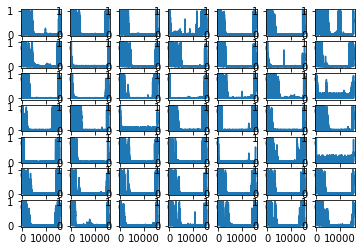

In [178]:
n = 49
processed_data = []
fig, axs = plt.subplots(7, 7)
for i in range(n):
    t = np.absolute(data[i])

    # Find max value of array
    tmax = 0
    for j in range(len(t)):
        if t[j] > t[tmax]:
            tmax = j

    t2 = list(t[tmax:]) + list(t[:tmax])
    t3 = [i / t2[0] for i in t2]
    processed_data.append(t3)
    axs[math.floor(i / 7)][i % 7].plot(t3)
    
plt.show()

In [179]:
test = processed_data[-1]
for i in range(49):
    print(compare(test, processed_data[i]))

0.10382480026858219
0.11646356414325068
0.10221551085073519
0.15789416364860082
0.10102844886688736
0.10550630013780787
0.14791886924966163
0.10338366865768557
0.11580140218081544
0.09774661663999425
0.09383056082912344
0.09697177613358994
0.11354420556164277
0.11866739052450839
0.09640176132990969
0.10965966388459263
0.1306959480021113
0.12062143422975634
0.10682264904099094
0.1053350880501461
0.1184853983662317
0.1765903898347288
0.10227252932987936
0.1187844807213596
0.13476046233798525
0.11779841882502992
0.10547224578044397
0.09641497835585942
0.12879479914765615
0.1007754585742652
0.1135772617219282
0.12745361243287862
0.1189471888995046
0.14168204120020497
0.1269852840650915
0.11904956121918614
0.0977080697499371
0.1026016065363801
0.09300327814331132
0.1129079626056873
0.10432682569759004
0.09555548203425707
0.11461026206871851
0.10395210391216633
0.10929512294187223
0.09164018639337586
0.11544208247932375
0.13990591356939033
0.0


0.11684861416338685


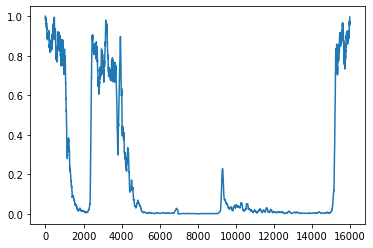

In [177]:
with open('buffers/book/0.wav', 'rb') as file:
        d1 = [bytes([b]) for b in file.read()[44:32000]]
        d2 = [i[0] + i[1] for i in list(chunks(d1, 2))]
        d3 = [int.from_bytes(i, byteorder='big', signed=True) for i in d2]
        t = smooth(np.absolute(d3), 100)

        # Find max value of array
        tmax = 0
        for j in range(len(t)):
            if t[j] > t[tmax]:
                tmax = j

        t2 = list(t[tmax:]) + list(t[:tmax])
        t3 = [i / t2[0] for i in t2]
        processed_data.append(t3)
        plt.plot(t3)
        print(compare(test, t3))